## Clustering

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_blobs

# import clustering algs
from sklearn.cluster import KMeans, MeanShift
from sklearn.model_selection import train_test_split

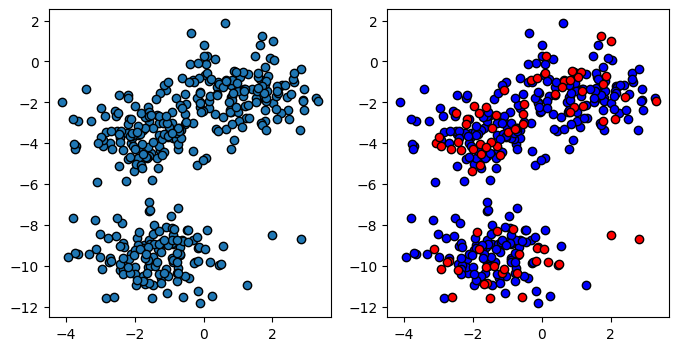

In [ ]:
X , y = make_blobs(n_samples = 400, n_features = 2, random_state=2) #, centers = clusters

X_train,X_test,_,y_test =train_test_split(X,y, test_size=0.2, random_state=1)

#Esto es para graficar mas de un plot se usa el axes, con sus especificaciones en el plt.subplots
_, axes = plt.subplots(1,2,figsize = (8,4))
axes[0].scatter( X [:, 0], X [:, 1], marker ='o', edgecolors='k')
axes[1].scatter( X_train [:, 0], X_train [:, 1], c ='b', edgecolors='k')
axes[1].scatter( X_test [:, 0], X_test [:, 1], c ='r', edgecolors='k')
plt.show()

In [ ]:
# import decision boundaries function
def plot_decision_boundaries(model, X, y):
    # Paso 1: Determinar mínimo y máximo para los ejes
    h_min, h_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    v_min, v_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    # Paso 2: Crear la cuadrícula o grid
    h_grid, v_grid = np.meshgrid(np.linspace(h_min, h_max, 200), np.linspace(v_min, v_max, 200))

    # Paso 3: Calcular predicciones para cada punto en la cuadrícula
    pred_grid = model.predict(np.c_[h_grid.ravel(), v_grid.ravel()])

    # Paso 4: Cambiar el tamaño de las predicciones para que coincida con la cuadrícula
    pred_grid = pred_grid.reshape(h_grid.shape)

    # Paso 5: Crear el gráfico de la cuadrícula
    _, ax = plt.subplots(figsize=(5, 4))
    ax.pcolormesh(h_grid, v_grid, pred_grid, cmap='Paired')
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='Paired')

    # Eliminar números en los ejes
    ax.set_xticks([])
    ax.set_yticks([])

    # Mostrar el gráfico
    plt.show()


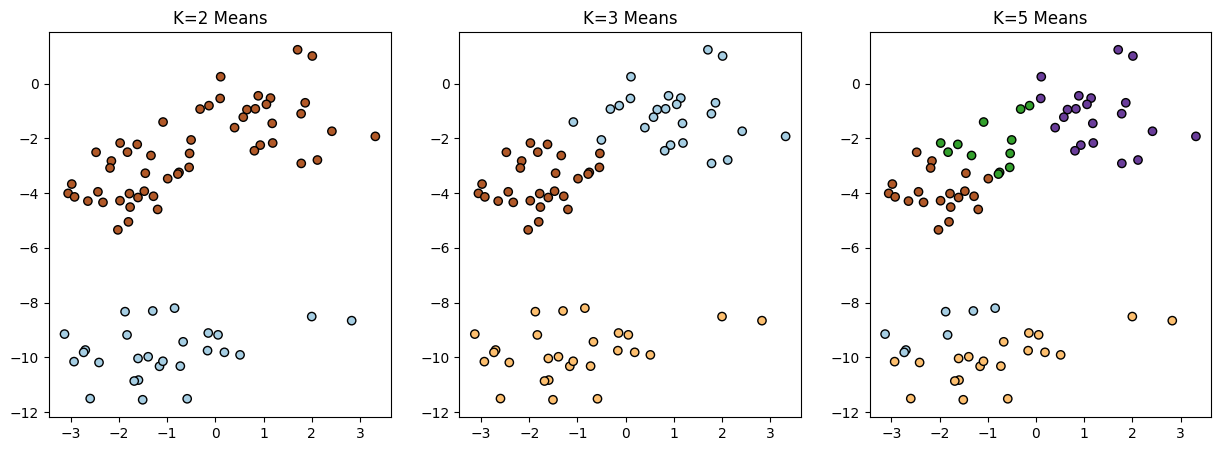

In [ ]:
models = [ KMeans(n_clusters=2) , KMeans(n_clusters=3) , KMeans(n_clusters= 5) ]
names= ["K=2 Means", "K=3 Means", "K=5 Means"]


_, axes = plt.subplots(1, 3, figsize = (15,5))
predictions = {}

# fit the model
for model,name,ax in zip(models,names,axes) :
    # Instance and train
    model.fit(X_train)

    # Predictions on train and test sets
    predictions[name]= model.predict(X_test)

    # Plot everything
    ax.scatter(X_test[:,0], X_test[:,1], c=predictions[name], edgecolors='k',cmap='Paired')
    ax.set_title(name)
# plt.show()

## Metrics

The metrics module [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [ ]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

In [ ]:
## Scores for training data

for name in names :
  print ("########----- Results for {0} -----########".format( name ))
  ari = adjusted_rand_score( y_test , predictions[name] )
  ami = adjusted_mutual_info_score( y_test , predictions[name] )
  sil = silhouette_score( X_test, predictions[name])
  ##--------------
  print("-- ARI --\t -- AMI --\t -- SIL --")
  print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}  \t".format(ari, ami,sil))

########----- Results for K=2 Means -----########
-- ARI --	 -- AMI --	 -- SIL --
  0.577  	   0.734  	   0.657  	
########----- Results for K=3 Means -----########
-- ARI --	 -- AMI --	 -- SIL --
  0.927  	   0.916  	   0.600  	
########----- Results for K=5 Means -----########
-- ARI --	 -- AMI --	 -- SIL --
  0.684  	   0.769  	   0.321  	


## In real data

In [1]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

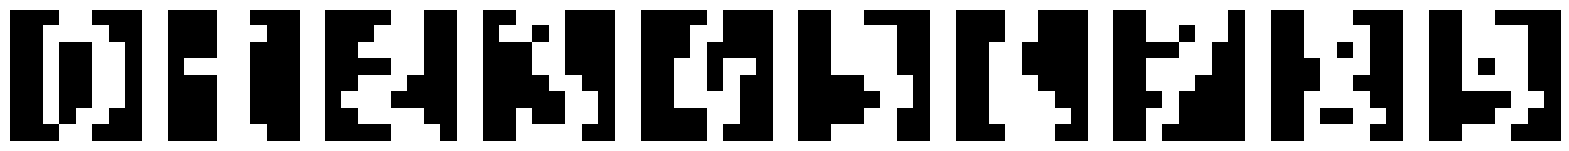

In [2]:
digits = load_digits()
images = (digits.images > 6) * 1.0
X_digits = digits.data

_, axes = plt.subplots(1, 10, figsize=(20, 4))
for i, ax in enumerate(axes):
    ax.imshow(images[i].reshape(8, 8), cmap="gray")
    ax.axis("off")
plt.show()

In [3]:
# Crear modelos KMeans con diferentes cantidades de clusters
models = [KMeans(n_clusters=10, random_state=42), KMeans(n_clusters=16, random_state=42), KMeans(n_clusters=20, random_state=42)]
names = ["K=10 Means", "K=16 Means", "K=20 Means"]

# Almacenar predicciones
predictions = {}

# Ajustar y evaluar cada modelo
for model, name in zip(models, names):
    # Entrenar el modelo KMeans
    model.fit(X_digits)
    predictions[name] = model.predict(X_digits)

    # Calcular métricas
    ari = adjusted_rand_score(digits.target, predictions[name])
    ami = adjusted_mutual_info_score(digits.target, predictions[name])
    sil = silhouette_score(X_digits, predictions[name])

    # Mostrar resultados
    print("########----- Results for {0} -----########".format(name))
    print("-- ARI --\t -- AMI --\t -- SIL --")
    print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}".format(ari, ami, sil))


########----- Results for K=10 Means -----########
-- ARI --	 -- AMI --	 -- SIL --
  0.726  	   0.773  	   0.176
########----- Results for K=16 Means -----########
-- ARI --	 -- AMI --	 -- SIL --
  0.641  	   0.739  	   0.161
########----- Results for K=20 Means -----########
-- ARI --	 -- AMI --	 -- SIL --
  0.637  	   0.747  	   0.154


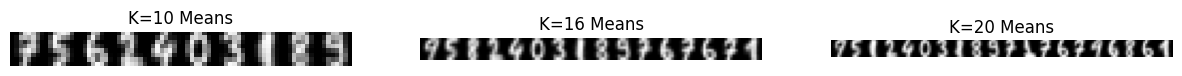

In [4]:
# Visualización de los clusters generados
_, axes = plt.subplots(1, 3, figsize=(15, 5))
for model, name, ax in zip(models, names, axes):
    centers = model.cluster_centers_.reshape(-1, 8, 8)  # Centros de los clusters como imágenes de 8x8
    ax.imshow(np.concatenate(centers, axis=1), cmap="gray")
    ax.set_title(name)
    ax.axis("off")
plt.show()